Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop, SGD

Extract data from the dataset

In [2]:
filedr = r'C:\Users\ashiq\OneDrive\Documents\face and gender detection\archive (5)\UTKFace'

import os
files = os.listdir(filedr)

Create list of images,Age and Gender from the dataset


In [3]:
ages=[]
genders=[]
images=[]

for fl in files:
    age = int(fl.split('_')[0])
    gender = int(fl.split('_')[1])
    total = filedr + '/' + fl
    #print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)
    ages.append(age)
    genders.append(gender)
    

Viewing sample

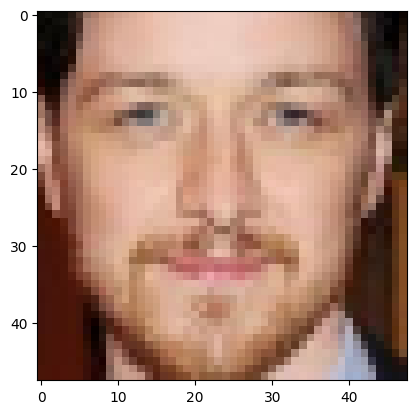

10
0


In [4]:
plt.imshow(images[8000])
plt.show()


print(ages[87])

print(genders[87])

save images array,ages array,gender arrays


In [5]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

np.save(filedr+'image.npy',images_f)
np.save(filedr+'ages.npy',ages_f)
np.save(filedr+'genders.npy',genders_f)


finding the no of male and female samples


In [6]:
k=np.unique(genders_f,return_counts=True)

print(k)


(array([0, 1]), array([12391, 11317], dtype=int64))


Plotting no of male and female samples

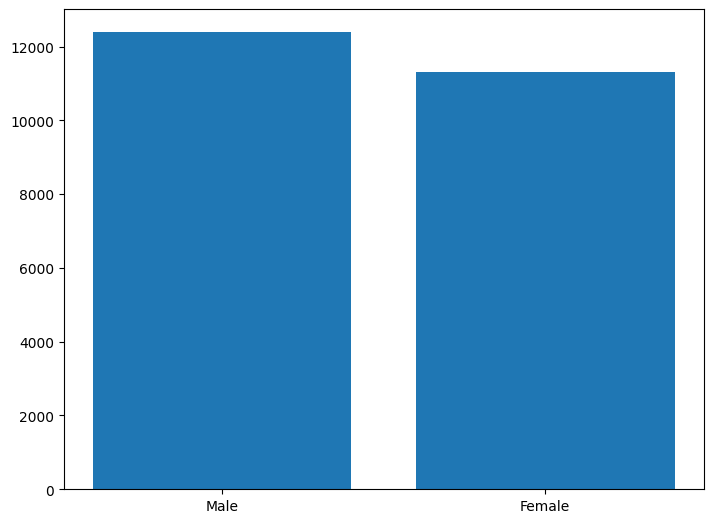

In [7]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding the no of samples in each age

In [8]:
values, count=np.unique(ages_f,return_counts=True)
print(count)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [9]:
count = count.tolist()

Defining labels for output

In [10]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

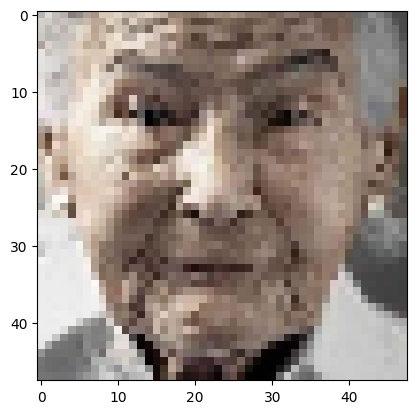

In [11]:
plt.imshow(images[9])

In [12]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [13]:
labels_f=np.array(labels)

Splitting the dataset for testing and training

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [16]:
Y_train[0:5]

array([[45,  0],
       [ 9,  0],
       [16,  0],
       [26,  1],
       [28,  0]])

In [17]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]


print(Y_train_2)

[array([0, 0, 0, ..., 1, 1, 1]), array([45,  9, 16, ..., 26, 80,  1])]


In [18]:
Y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [19]:
Y_train_2[1][0:5]

array([45,  9, 16, 26, 28])

Defining the model

In [20]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [21]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer='rmsprop',metrics=["accuracy",'mse'])
    return model

In [22]:
model_ag=model((48,48,3))

In [23]:
model_ag.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Intializing the model

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_sex_out_accuracy',verbose=1,save_best_only=True,save_weights_only=False, mode="max",save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_sex_out_accuracy',restore_best_weights='True',mode='max')
callback_list=[checkpoint,Early_stop]

In [26]:
history_ag=model_ag.fit(X_train,Y_train_2,batch_size=128,validation_data=(X_test,Y_test_2),epochs=100, callbacks=callback_list)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - age_out_mse: 683.4399 - loss: 21.3293 - sex_out_accuracy: 0.5195
Epoch 1: val_sex_out_accuracy improved from -inf to 0.52556, saving model to Age_Sex_Detection.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 48s 314ms/step - age_out_mse: 682.4427 - loss: 21.3118 - sex_out_accuracy: 0.5196 - val_age_out_mse: 548.6639 - val_loss: 18.8548 - val_sex_out_accuracy: 0.5256
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - age_out_mse: 465.1225 - loss: 17.1951 - sex_out_accuracy: 0.5166
Epoch 2: val_sex_out_accuracy did not improve from 0.52556
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 332ms/step - age_out_mse: 465.0301 - loss: 17.1931 - sex_out_accuracy: 0.5166 - val_age_out_mse: 427.8235 - val_loss: 15.8900 - val_sex_out_accuracy: 0.5256
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - age_out_mse: 415.9861 - loss: 16.1550 - sex_out_accuracy: 0.5287
Epoch 3: val_sex_out_accuracy did not improve from 0.52556
139/139 ━━━━━━━━━━━━━━━━━━━━ 42s 30

In [27]:
#history_ag.save('trained_model.h5')

Model Evaluation

In [28]:
model_ag.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - age_out_mse: 151.8941 - loss: 9.5531 - sex_out_accuracy: 0.8991


[9.609700202941895, 154.0783233642578, 0.896068811416626]

In [29]:
pred=model_ag.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


In [30]:
pred[1]

array([[56.493652],
       [32.593834],
       [17.235182],
       ...,
       [40.991127],
       [25.558569],
       [19.668242]], dtype=float32)

Plotting Loss

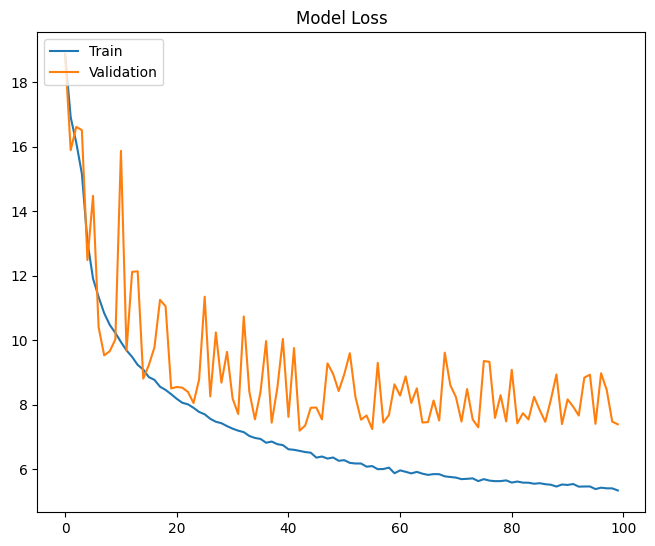

In [31]:
plt.plot(history_ag.history['loss'])
plt.plot(history_ag.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Sex Accuracy

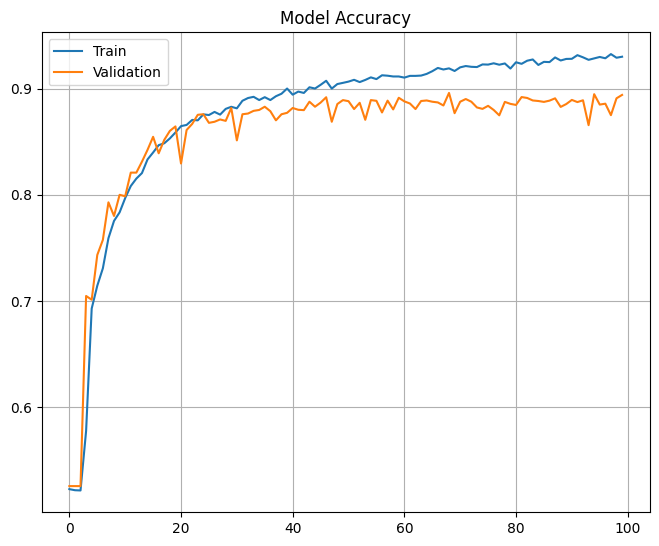

In [32]:
plt.plot(history_ag.history['sex_out_accuracy'])
plt.plot(history_ag.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
plt.grid()

Plotting Gender Accuracy

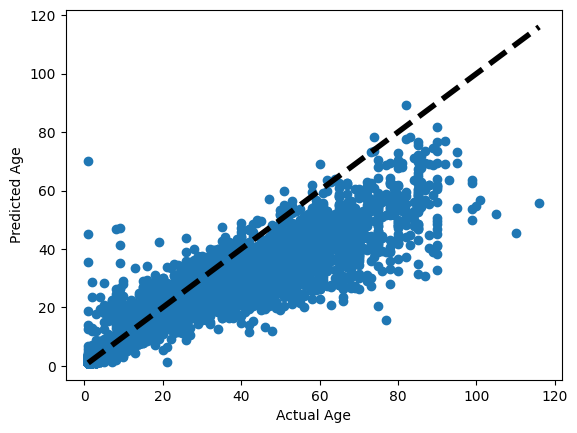

In [33]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making report of the model (Gender Only)

In [34]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
report=classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3115
           1       0.91      0.87      0.89      2812

    accuracy                           0.90      5927
   macro avg       0.90      0.89      0.90      5927
weighted avg       0.90      0.90      0.90      5927



Making Heatmap of the model (Gender Only)

In [37]:
results=confusion_matrix(Y_test_2[0],Pred_l)

In [38]:
print(results)

[[2874  241]
 [ 375 2437]]


<Axes: >

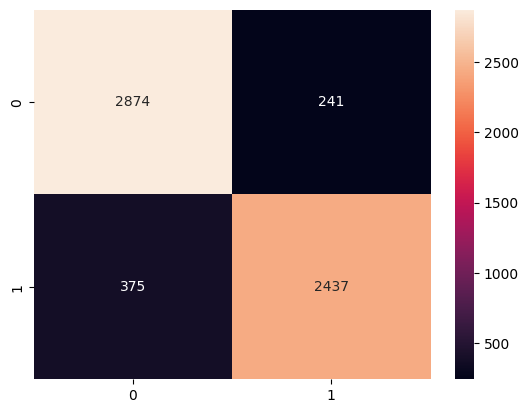

In [39]:
import seaborn as sns
sns.heatmap(results,annot=True, fmt=".0f")

Testing some sample images

In [40]:
def test_image(ind,images_f,images_f_2,model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Age is 8
Predicted Gender is Male


C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


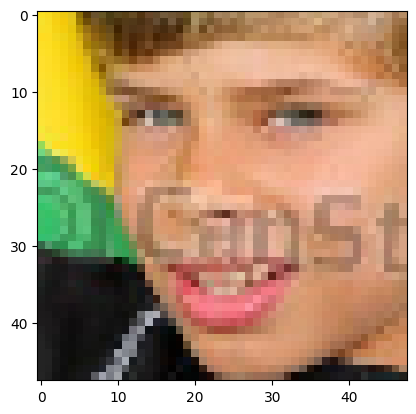

In [41]:
test_image(45,images_f,images_f_2,model_ag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Age is 6
Predicted Gender is Male


C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


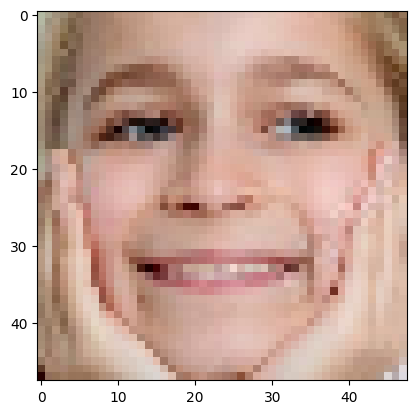

In [42]:
test_image(123,images_f,images_f_2,model_ag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Age is 10
Predicted Gender is Female


C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


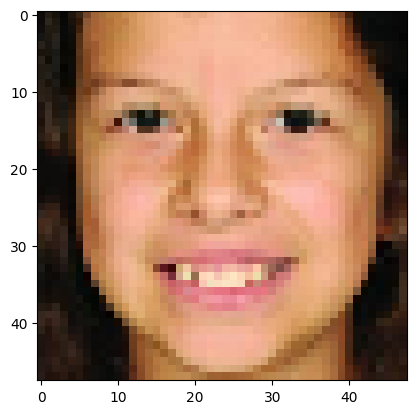

In [43]:
test_image(543,images_f,images_f_2,model_ag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Age is 3
Predicted Gender is Male


C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


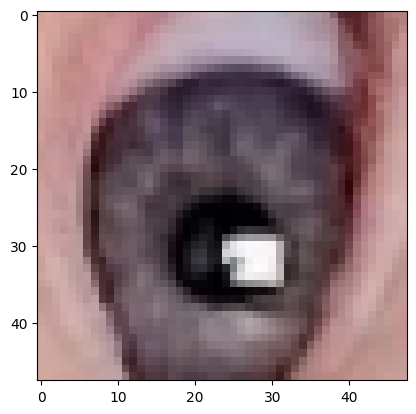

In [44]:
test_image(2343,images_f,images_f_2,model_ag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 1
Predicted Gender is Male


C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\ashiq\AppData\Local\Temp\ipykernel_2184\1136749098.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


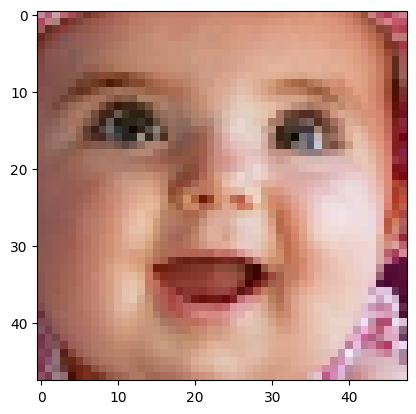

In [45]:
test_image(2345,images_f,images_f_2,model_ag)

In [1]:
import cv2
import numpy as  np
cap = cv2.VideoCapture(0)  # 0 for default camera (usually front camera on laptops)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_resized = cv2.resize(frame_rgb, (48, 48))
    frame_normalized = frame_resized / 255.0
    frame_input = np.expand_dims(frame_normalized, axis=0)

    # Make predictions
    predictions = model_ag.predict(frame_input)
    
    # Process predictions
    sex_pred = int(np.round(predictions[0][0]))
    age_pred = int(np.round(predictions[1][0]))
    
    sex_label = 'Female' if sex_pred == 1 else 'Male'
    
    # Display results on the frame
    cv2.putText(frame, f"Age: {age_pred}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Gender: {sex_label}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Live Prediction', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

NameError: name 'model_ag' is not defined